In [1]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

# 1. Зашумить изображение при помощи шума гаусса, постоянного шума.

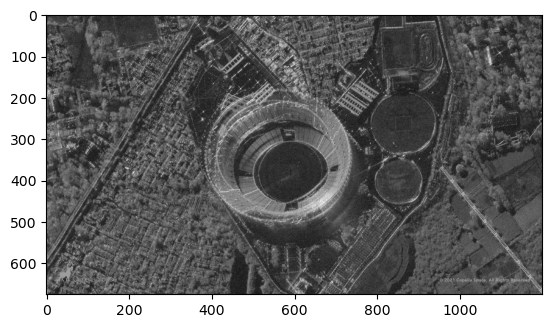

In [73]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

[[  0 187   0 ... 144   9   0]
 [  0 164  24 ...   0   0   0]
 [121   0  30 ...  58   0   0]
 ...
 [  0  52  22 ...   0 161  49]
 [133   0   0 ...  10   0   0]
 [ 61   0   0 ...  85 113  72]]


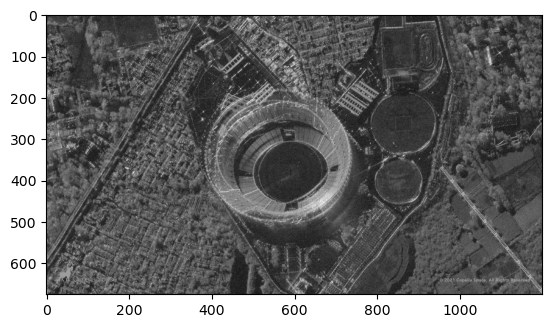

In [74]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
image_noise_gauss = cv2.add(image_gray,noise_gauss)
print(cv2.randn(noise_gauss, mean, stddev))
plt.imshow(image_noise_gauss, cmap="gray")

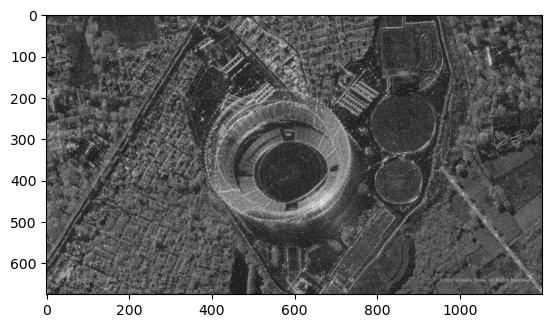

In [75]:
noise = np.random.randint(0, 101, size=(image_gray.shape[0], image_gray.shape[1]), dtype=int)

zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

image_noise = image_gray.copy()

image_noise[zeros_pixel] = 0

image_noise[ones_pixel] = 255

plt.imshow(image_noise, cmap="gray")

# 2. Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

In [76]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

0.0 1.0


488.40937777777776 0.2832246949387743


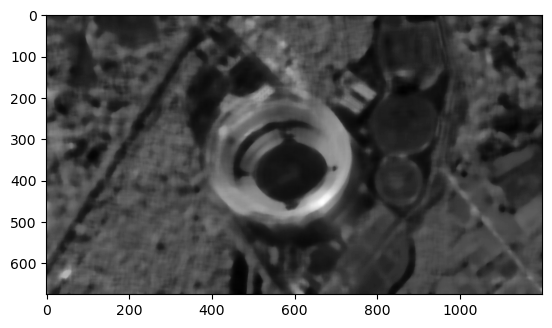

In [77]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 19)
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)
print(mse_gauss_median, ssim_gauss_median)
plt.imshow(image_gauss_median, cmap="gray")

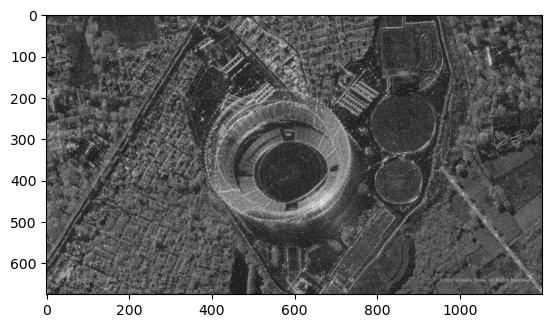

In [78]:
import copy
image_sp = copy.deepcopy(image_gray)
image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255
plt.imshow(image_sp, cmap="gray")

In [79]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

388.19782716049383 0.721620601331879


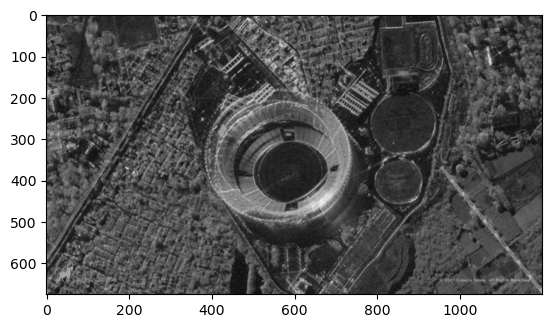

In [80]:
image_sp_median = cv2.medianBlur(image_sp, 3)
plt.imshow(image_sp_median, cmap="gray")

In [81]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.716 0.816249265460877


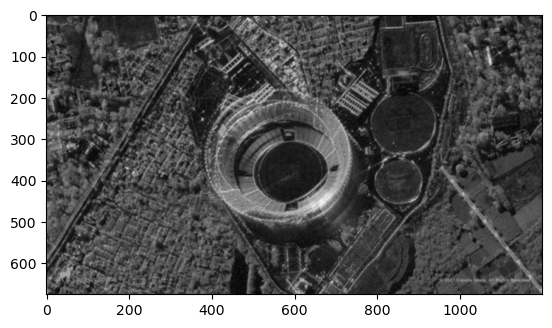

In [82]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)
plt.imshow(image_gauss_gauss, cmap="gray")

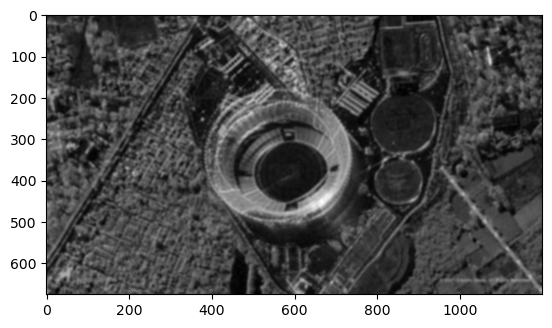

In [83]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,500,500)
plt.imshow(image_gauss_bilat, cmap="gray")

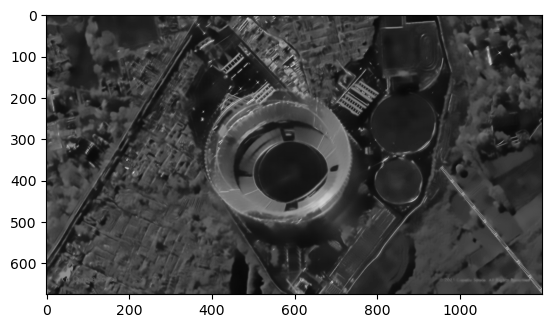

In [84]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)
plt.imshow(image_gauss_nlm, cmap="gray")